# Classification Demo

Loading common libraries

In [1]:
from keras.preprocessing.image import ImageDataGenerator
from testing import load_image
import experiments as exp
import numpy as np
from skimage import io

import matplotlib.pyplot as plt

def show_classification_result(img_path, label):
    img = io.imread(img_path)
    
    fig = plt.figure(figsize=(3, 3))
    plt.clf()
    ax = fig.add_subplot(111)
    ax.set_aspect(1)
    plt.title(label)
    plt.imshow(np.asarray(img))
    plt.yticks([], [])
    plt.xticks([], [])
    plt.show()

with open('datasets/ntcir/categories.txt') as f:
    labels = f.readlines()

Using TensorFlow backend.


## ResNet-50 on 21 Activities

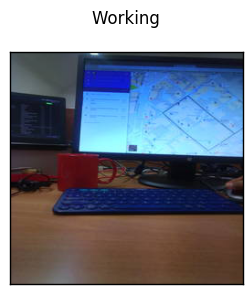

In [2]:
datagen = ImageDataGenerator(rescale=1. / 255)    
model = exp.resNet50_second_phase(weights='weights.resNet50.lr_0.001.phase_2.fold_10.epoch_02.tf.hdf5')
img = load_image(datagen, '183700.jpg', (224,224))
predictions = model.predict(img)
category = np.argmax(predictions)

show_classification_result('183700.jpg', labels[category])